## Volatility Targeting - Allocating money to stocks based on target risk level

   Instead of dollar diversification, its risk diversification and when asset allocations are adjusted to the same risk level, portfolio can achieve higher Sharpe Ration and can be more resistant to market downturn

    screeners to define the universe
    add rebalance function

In [29]:
from finvizfinance.screener.overview import Overview
import yfinance as yf
import riskfolio as rp
import pandas as pd
import numpy as np

In [30]:
overView = Overview()
# overView.set_filter(filters_dict= {'Index': 'S&P 500', 'Price': 'Over $50', 'Country':'USA', 'Market Cap.':'+Mid (over $2bln)', 'P/E':'Over 20', 'Beta': 'Over 1', 'Average Volume': 'Over 100K' })
overView.set_filter(signal="New High", filters_dict= {'Price': 'Over $15', 'Country':'USA', 'Market Cap.':'+Mid (over $2bln)'})
screen_data = overView.screener_view()

d:\anaconda3\envs\quant-stack-bk\lib\site-packages\finvizfinance\screener\overview.py:203: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, pd.DataFrame(frame)], ignore_index=True)


In [31]:
screen_data

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,ABM,ABM Industries Inc.,Industrials,Specialty Business Services,USA,3.430000e+09,13.81,52.30,0.0,0.0
1,RYTM,Rhythm Pharmaceuticals Inc.,Healthcare,Biotechnology,USA,2.460000e+09,NaN,41.64,0.0,0.0
2,CADE,Cadence Bank,Financial,Banks - Regional,USA,5.450000e+09,14.62,29.54,0.0,0.0
3,X,United States Steel Corp.,Basic Materials,Steel,USA,8.610000e+09,8.47,38.59,0.0,0.0
4,VRTX,"Vertex Pharmaceuticals, Inc.",Healthcare,Biotechnology,USA,1.043800e+11,30.40,405.07,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
105,JXN,Jackson Financial Inc,Financial,Insurance - Life,USA,4.030000e+09,2.40,50.33,0.0,0.0
106,BCO,Brink's Co.,Industrials,Security & Protection Services,USA,3.910000e+09,29.81,86.76,0.0,0.0
107,PINS,Pinterest Inc,Communication Services,Internet Content & Information,USA,2.462000e+10,NaN,36.51,0.0,0.0
108,CE,Celanese Corp,Basic Materials,Chemicals,USA,1.579000e+10,7.82,145.05,0.0,0.0


In [32]:
stocks_of_interest = screen_data[screen_data['Market Cap'] >= screen_data['Market Cap'].quantile(0.60)]

In [33]:
tickers = stocks_of_interest.Ticker.to_list() #screen_data.Ticker.to_list() #
tickers.sort()

In [34]:
ticker_data = yf.download(tickers=tickers, start = '2019-01-01')

[*********************100%%**********************]  44 of 44 completed


In [35]:
historic_prices = ticker_data.loc[:,('Adj Close', slice(None))]
historic_prices.columns = tickers

In [36]:
historic_prices.dropna(inplace=True)

C:\Users\cadaa\AppData\Local\Temp\ipykernel_24808\763589702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic_prices.dropna(inplace=True)


In [37]:
historic_prices

,ARES,AVGO,AXON,BX,CE,COF,COIN,COST,CTAS,DECK,...,SNAP,SPG,SPGI,STX,TDG,TTWO,URI,VRTX,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-14,51.827213,444.565552,152.440002,70.342415,144.555801,128.205765,328.279999,356.035217,340.587585,336.140015,...,62.009998,97.407082,363.162659,72.809029,589.837585,181.440002,320.526917,217.130005,192.389999,159.796967
2021-04-15,51.495342,447.080414,153.250000,71.830406,146.430099,127.355904,322.750000,361.554565,342.319275,339.529999,...,63.889999,98.100639,366.130219,73.761330,585.026306,182.500000,320.852325,221.100006,195.919998,162.119186
2021-04-16,51.522999,445.953400,152.740005,71.496750,148.737656,129.065033,342.000000,363.436890,341.015594,341.059998,...,61.250000,100.284073,369.058746,74.432465,579.117798,178.800003,323.563995,219.389999,192.490005,164.255295
2021-04-19,51.633614,430.314911,150.550003,71.514763,149.067307,127.865799,333.000000,362.289886,334.419434,337.260010,...,60.439999,99.804573,367.467499,74.668266,568.341919,177.910004,320.063507,219.179993,190.940002,164.715866
2021-04-20,50.213955,425.899994,150.789993,71.695145,146.496048,124.173660,320.820007,364.427032,332.434784,327.850006,...,58.490002,97.835197,370.025146,74.740814,558.728821,177.899994,306.406616,220.160004,186.080002,165.589264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-07,108.300003,922.260010,235.330002,113.860001,141.710007,115.379997,136.190002,610.950012,553.750000,694.419983,...,14.760000,131.350006,417.380005,78.779999,972.960022,154.210007,484.019989,353.950012,200.050003,181.830002
2023-12-08,110.639999,944.299988,236.380005,112.570000,141.350006,118.089996,146.619995,610.780029,553.330017,695.380005,...,15.090000,132.880005,415.380005,80.589996,983.919983,155.320007,495.059998,350.149994,198.800003,184.600006
2023-12-11,110.720001,1029.239990,238.779999,112.989998,142.380005,118.809998,138.020004,623.859985,559.599976,697.859985,...,15.750000,134.779999,423.750000,81.989998,992.520020,152.559998,505.140015,356.290009,205.470001,189.460007


In [38]:
daily_returns = historic_prices[tickers].pct_change().dropna()

In [39]:
daily_returns

,ARES,AVGO,AXON,BX,CE,COF,COIN,COST,CTAS,DECK,...,SNAP,SPG,SPGI,STX,TDG,TTWO,URI,VRTX,ZS,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-15,-0.006403,0.005657,0.005314,0.021154,0.012966,-0.006629,-0.016845,0.015502,0.005084,0.010085,...,0.030318,0.007120,0.008171,0.013079,-0.008157,0.005842,0.001015,0.018284,0.018348,0.014532
2021-04-16,0.000537,-0.002521,-0.003328,-0.004645,0.015759,0.013420,0.059644,0.005206,-0.003808,0.004506,...,-0.041321,0.022257,0.007999,0.009099,-0.010100,-0.020274,0.008451,-0.007734,-0.017507,0.013176
2021-04-19,0.002147,-0.035068,-0.014338,0.000252,0.002216,-0.009292,-0.026316,-0.003156,-0.019343,-0.011142,...,-0.013225,-0.004781,-0.004312,0.003168,-0.018607,-0.004978,-0.010819,-0.000957,-0.008052,0.002804
2021-04-20,-0.027495,-0.010260,0.001594,0.002522,-0.017249,-0.028875,-0.036577,0.005899,-0.005935,-0.027901,...,-0.032263,-0.019732,0.006960,0.000972,-0.016914,-0.000056,-0.042669,0.004471,-0.025453,0.005302
2021-04-21,0.011015,0.005533,-0.005969,0.010189,0.020059,0.010722,-0.027741,0.006349,0.017413,0.015617,...,-0.003248,0.029494,0.009761,0.017838,0.000739,-0.008151,0.019341,-0.001817,0.000215,0.008356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-07,0.003521,0.020606,0.012869,0.015610,0.005535,0.014151,0.011587,0.005795,0.005119,0.009728,...,-0.000677,0.011708,-0.003057,0.012466,0.009808,-0.019769,0.015910,0.001386,0.010813,-0.000934
2023-12-08,0.021607,0.023898,0.004462,-0.011330,-0.002540,0.023488,0.076584,-0.000278,-0.000758,0.001382,...,0.022358,0.011648,-0.004792,0.022975,0.011265,0.007198,0.022809,-0.010736,-0.006248,0.015234
2023-12-11,0.000723,0.089950,0.010153,0.003731,0.007287,0.006097,-0.058655,0.021415,0.011331,0.003566,...,0.043738,0.014299,0.020150,0.017372,0.008741,-0.017770,0.020361,0.017535,0.033551,0.026327


In [40]:
portfolio = rp.Portfolio(returns=daily_returns)

In [41]:
# Define params for risk parity optimizer
portfolio.lowerret = 0.0008
portfolio.assets_stats(method_mu="hist", method_cov="hist", d=0.94)
w_rp = portfolio.rp_optimization(model="Classic", rm="MV", rf=0.05, hist=True)

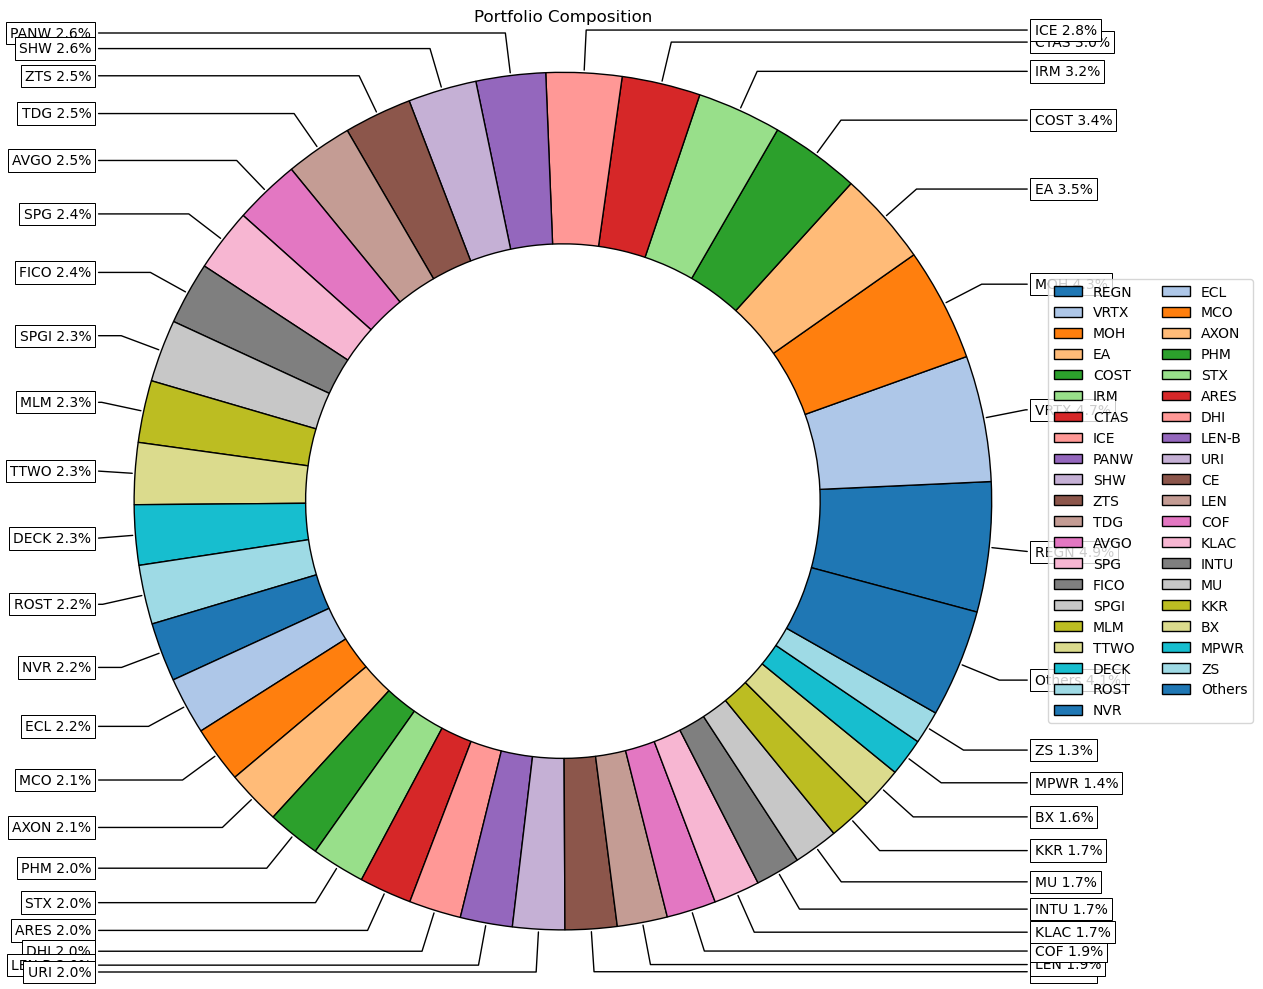

In [42]:
pie = rp.plot_pie(
    w=w_rp,
    width=12,
    height=10,
    ax=None
)

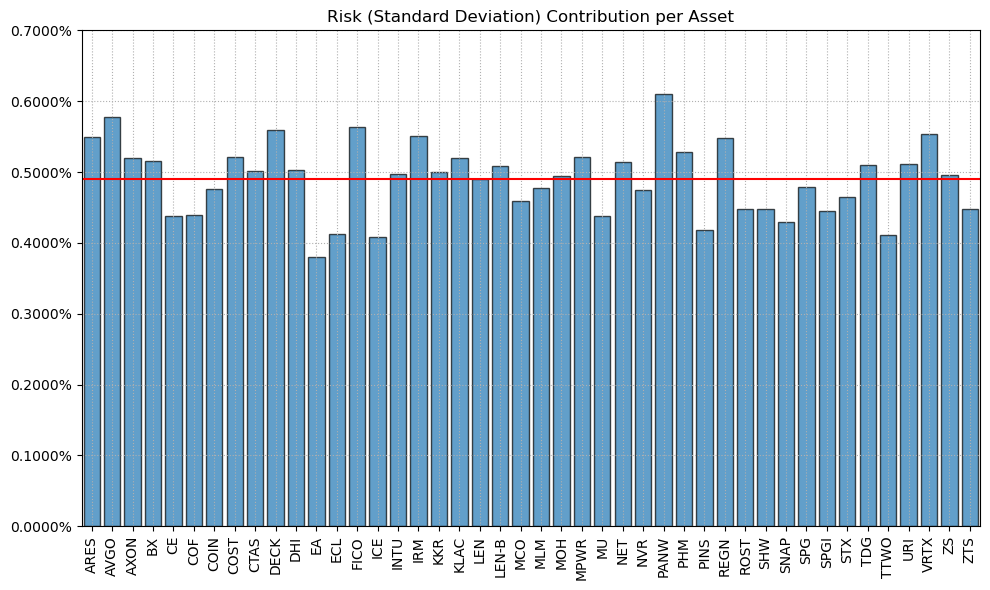

In [43]:
ax = rp.plot_risk_con(
    w=w_rp,
    cov= portfolio.cov,
    returns= portfolio.returns,
    rm="MV",
    rf=0.05
)

In [44]:
portfolio_value = 100_000

In [45]:
w_rp['investment_amount'] = w_rp * portfolio_value # weight * Market Value

In [46]:
w_rp.investment_amount.sum()

100000.00000000001

In [47]:
w_rp['last_price'] = historic_prices.iloc[-1]

In [48]:
w_rp

,weights,investment_amount,last_price
ARES,0.019738,1973.821140,113.949997
AVGO,0.024796,2479.617274,1089.689941
AXON,0.020512,2051.220612,248.059998
BX,0.015569,1556.887098,119.750000
CE,0.019502,1950.229268,145.050003
COF,0.018623,1862.302449,125.089996
COIN,0.008904,890.437253,150.460007
COST,0.033828,3382.834068,642.000000
CTAS,0.029604,2960.360687,574.900024
DECK,0.022612,2261.243044,719.270020


In [49]:
w_rp['shares'] = 0 #round(w_rp.investment_amount / w_rp.last_price)

In [50]:
#drop shares with zero values
# w_rp.loc[(w_rp[['shares']] != 0).all(axis=1)]

In [51]:
def allocate(df, amount):
    no_more_allocated = True
    for row in df.itertuples():
        last_price = w_rp.at[row.Index, 'last_price']
        invested_amount = w_rp.at[row.Index, 'shares'] * last_price 
        if last_price < amount and w_rp.at[row.Index, 'investment_amount'] > (invested_amount+last_price):
            amount -= last_price
            w_rp.at[row.Index, 'shares'] += 1
            no_more_allocated = False
        else:
            continue
    return amount, no_more_allocated

In [52]:
remaining = portfolio_value
stopTheLoop = False
while(True):
    if remaining > 100 and stopTheLoop == False:
        remaining, stopTheLoop = allocate(w_rp, remaining)
    else:
        break
    

In [53]:
w_rp['invested_amount'] = w_rp.last_price * w_rp.shares

In [54]:
w_rp

,weights,investment_amount,last_price,shares,invested_amount
ARES,0.019738,1973.821140,113.949997,17,1937.149948
AVGO,0.024796,2479.617274,1089.689941,2,2179.379883
AXON,0.020512,2051.220612,248.059998,8,1984.479980
BX,0.015569,1556.887098,119.750000,13,1556.750000
CE,0.019502,1950.229268,145.050003,13,1885.650040
COF,0.018623,1862.302449,125.089996,14,1751.259949
COIN,0.008904,890.437253,150.460007,5,752.300034
COST,0.033828,3382.834068,642.000000,5,3210.000000
CTAS,0.029604,2960.360687,574.900024,5,2874.500122
DECK,0.022612,2261.243044,719.270020,3,2157.810059


In [55]:
w_rp[w_rp['shares'] == 0]

,weights,investment_amount,last_price,shares,invested_amount
NVR,0.022203,2220.281793,6684.859863,0,0.0


In [56]:
remaining = portfolio_value - (w_rp['shares'] * w_rp['last_price']).sum()
remaining

8021.349803924561

In [57]:
from ibapi.client import EClient
from ibapi.wrapper import EWrapper
from ibapi.contract import Contract
from ibapi.order import *

import time
import threading

In [58]:
class IBapi(EWrapper, EClient):
    def __init__(self):
        EClient.__init__(self, self)
        self.pos_df = pd.DataFrame(columns=['Account', 'Symbol', 'SecType',
                                            'Currency', 'Position', 'Avg cost']) 
    
    def nextValidId(self, orderId: int):
        super().nextValidId(orderId)
        self.nextOrderId = orderId
    
    def position(self, account, contract, position, avgCost):
        super().position(account, contract, position, avgCost)
        
        dictionary = {"Account":account, "Symbol": contract.symbol, "SecType": contract.secType,
                        "Currency": contract.currency, "Position": position, "Avg cost": avgCost}
        if self.pos_df["Symbol"].str.contains(contract.symbol).any():
            self.pos_df.loc[self.pos_df["Symbol"]==contract.symbol,"Position"] = position
            self.pos_df.loc[self.pos_df["Symbol"]==contract.symbol,"Avg cost"] = avgCost
        else:
            self.pos_df = pd.concat([self.pos_df,pd.DataFrame(dictionary, index=[0])], ignore_index=True)

In [59]:
def stock_contract(symbol, secType="STK", exchange="SMART", currency="USD"):
        contract = Contract()
        contract.symbol = symbol
        contract.secType = secType
        contract.exchange = exchange
        contract.currency = currency
        return contract
    
def submit_order(contract, direction, qty=100, orderType="MKT", transmit=True):
    order = Order()
    order.action = direction
    order.totalQuantity = qty
    order.orderType = orderType
    order.transmit = transmit
    order.eTradeOnly = ""
    order.firmQuoteOnly = ""
    # submit order
    app.placeOrder(app.nextOrderId, contract, order)
    app.nextOrderId += 1

In [60]:
def run_loop():
    app.run()

app = IBapi()
app.connect('127.0.0.1', 7497, 123) # verify this on ibroker client
app.nextOrderId = None

api_thread = threading.Thread(target=run_loop, daemon=True)
api_thread.start()

counter = 1
while True:
    if isinstance(app.nextOrderId, int):
        print("Connected")
        break
    else:
        counter = counter+1
        print(f"Waiting {counter}")
        if counter == 60:
            app.disconnect()
            break
        time.sleep(1)

ERROR -1 2104 Market data farm connection is OK:hfarm
ERROR -1 2104 Market data farm connection is OK:usfarm.nj
ERROR -1 2104 Market data farm connection is OK:jfarm
ERROR -1 2104 Market data farm connection is OK:usfuture
ERROR -1 2104 Market data farm connection is OK:cashfarm
ERROR -1 2104 Market data farm connection is OK:eufarmnj
ERROR -1 2104 Market data farm connection is OK:usfarm
ERROR -1 2106 HMDS data farm connection is OK:euhmds
ERROR -1 2106 HMDS data farm connection is OK:fundfarm
ERROR -1 2106 HMDS data farm connection is OK:ushmds
ERROR -1 2158 Sec-def data farm connection is OK:secdefil


Waiting 2
Connected


In [ ]:
# for row in w_rp.itertuples():
#     contract = stock_contract(row.Index)
#     submit_order(contract, direction="BUY", qty=row.shares)

### Rebalance

In [61]:
app.reqPositions()
time.sleep(1)
pos_df = app.pos_df

C:\Users\cadaa\AppData\Local\Temp\ipykernel_24808\388680730.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.pos_df = pd.concat([self.pos_df,pd.DataFrame(dictionary, index=[0])], ignore_index=True)


In [62]:
w_rp.dropna(inplace=True)

In [63]:
w_rp['shares'] = w_rp['shares'].astype(float)


In [64]:
pos_df['Position'] = pos_df['Position'].astype(float)

In [65]:
df_change = (pd.merge(w_rp, pos_df.set_index('Symbol'),left_index=True,right_index=True, how="outer")
    .fillna(0.0)
    .assign(change = lambda x: x.shares - x.Position)
    .assign(buy = lambda x: np.where(x.change > 0, x.change, 0))
    .assign(sell = lambda x: np.where(x.change < 0, abs(x.change), 0))
)

In [66]:
df_buy = df_change[df_change.buy > 0]
df_sell = df_change[df_change.sell > 0]

In [67]:
for row in df_sell.itertuples():
    contract = stock_contract(row.Index)
    qty = row.sell
    if qty != 0:
        submit_order(contract, direction="SELL", qty=qty)

C:\Users\cadaa\AppData\Local\Temp\ipykernel_24808\388680730.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.pos_df.loc[self.pos_df["Symbol"]==contract.symbol,"Position"] = position
ERROR 146 200 No security definition has been found for the request


In [68]:
for row in df_buy.itertuples():
    contract = stock_contract(row.Index)
    qty = row.buy
    if qty != 0:
        submit_order(contract, direction="BUY", qty=row.buy)

ERROR 168 200 No security definition has been found for the request


In [69]:
app.disconnect()